## 선형모델(Linear Model)

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn  #> 학습 위해 만들어 놓은 패키지

import warnings
warnings.filterwarnings("ignore")

from matplotlib import rc, font_manager, rcParams
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)
rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split

w[0]: 0.393906  b: -0.031804


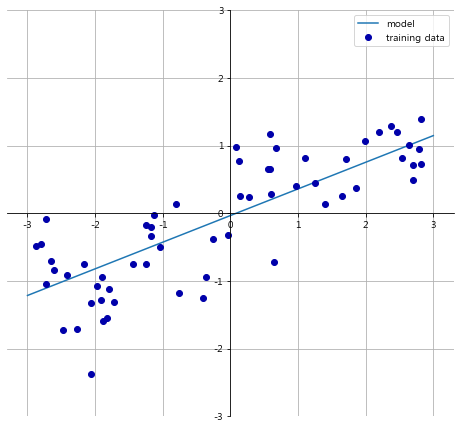

In [2]:
mglearn.plots.plot_linear_regression_wave()

#> MSE 평균제곱오차공식(오차를 최소로 하는 값 찾기)

In [3]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
lr = LinearRegression().fit(X_train, y_train)

In [5]:
print("기울기: {}, 절편: {}".format(lr.coef_, lr.intercept_))  #> 오차를 최소화하는 기울기와 절편

기울기: [0.44153666], 절편: -0.01711124414733381


In [6]:
print("훈련 점수: ", lr.score(X_train, y_train))
print("테스트 점수: ", lr.score(X_test, y_test))  #> 훈련 점수가 테스트 점수보다 낮으므로 과소적합의 우려 있다

훈련 점수:  0.6592061059587275
테스트 점수:  0.6932519118518163


In [7]:
### ex> 주제 : 전기 생산량과 소비량 관계
    # 귀무가설: 전기 생산량과 전기 소비량 간의 상관관계가 없다
    # 연구가설: 전기 생산량과 전기 소비량 간의 상관관계가 있다
    
# 월별 전기 사용량(백만kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53] 

# 월별 전기 생산금액(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

In [8]:
X = np.array(X).reshape(-1, 1)
y = np.array(y)

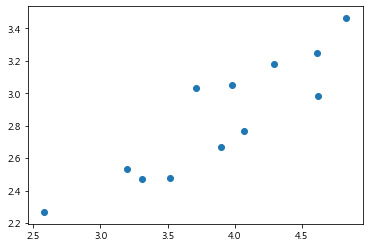

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(X, y)

In [10]:
# ex> 생산 금액이 4일 때 월별 전기 사용량 예측

from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

In [11]:
print("훈련 점수: ", lr.score(X_train, y_train))
print("테스트 점수: ", lr.score(X_test, y_test))

훈련 점수:  0.8208894742805498
테스트 점수:  0.6189918593093175


In [12]:
pred = lr.predict([[4]])

print("생산 금액이 4억 원일 때 월별 전기 사용량은 {} 이다".format(pred))

생산 금액이 4억 원일 때 월별 전기 사용량은 [2.9159492] 이다


In [13]:
num = np.array(X)
num = num.reshape(-1, 1)
lr2 = LinearRegression().fit(num, y)
print(lr2.coef_, ", ", lr2.intercept_)

[0.49560324] ,  0.919581428068942


In [14]:
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53] 

In [15]:
from scipy import stats

result = stats.linregress(X, y)  #> 리스트 그대로 넘겨도 괜찮다
result

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728)

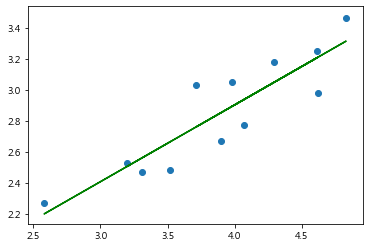

In [16]:
slope, intercept, r_value, p_value, stderr = stats.linregress(X, y)
plt.scatter(X, y)

arrX = np.array(X)
plt.plot(arrX, slope*arrX+intercept, c="green")  #> 회귀선 추가(배열 형식으로 넘겨야 한다). y=기울기*x+절편

In [17]:
slope*4+intercept  #> 생산 금액 4일 때 사용량

2.901994372142104

In [18]:
### 다중선형회귀

from sklearn.datasets import load_boston

boston = load_boston()

print(boston.keys())
print(boston.feature_names)
print(boston.target)

'''
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율
'''

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.

'\nCRIM: 범죄율\nINDUS: 비소매상업지역 면적 비율\nNOX: 일산화질소 농도\nRM: 주택당 방 수\nLSTAT: 인구 중 하위 계층 비율\nB: 인구 중 흑인 비율\nPTRATIO: 학생/교사 비율\nZN: 25,000 평방피트를 초과 거주지역 비율\nCHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0\nAGE: 1940년 이전에 건축된 주택의 비율\nRAD: 방사형 고속도로까지의 거리\nDIS: 직업센터의 거리\nTAX: 재산세율\n'

In [19]:
model_boston = LinearRegression().fit(boston.data, boston.target)  #> sklearn의 LinearRegression() 훈련 통한 예측에 사용

In [20]:
model_boston.coef_  #> 각 특성에 해당하는 기울기값

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [21]:
model_boston.intercept_

36.459488385089855

Text(0.5, 1.0, '<집값 예측치와 실제 집값의 관계>')

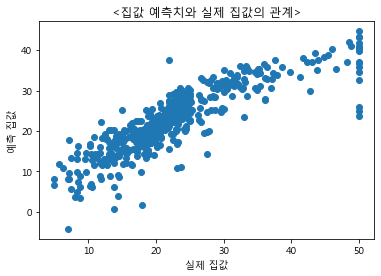

In [22]:
pred = model_boston.predict(boston.data)
plt.scatter(boston.target, pred)  #> 실제 집값과 예측값의 양의 상관관계 갖는다

plt.xlabel("실제 집값")
plt.ylabel("예측 집값")
plt.title("<집값 예측치와 실제 집값의 관계>")

In [23]:
# seaborn의 pairplot 이용한 각 변수들 간 상관관계 파악

df = pd.DataFrame(boston.data, columns=[boston.feature_names])  #> 데이터프레임화
df["MEDV"] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


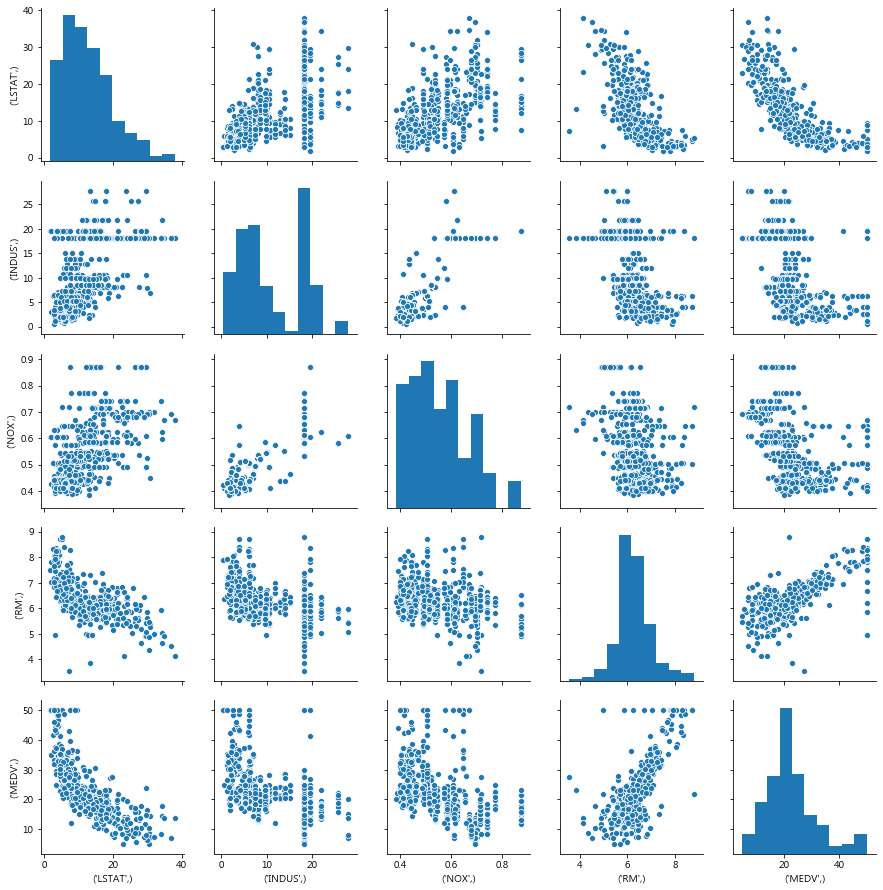

In [24]:
cols = ["LSTAT", "INDUS", "NOX", "RM", "MEDV"]

sns.pairplot(df[cols])

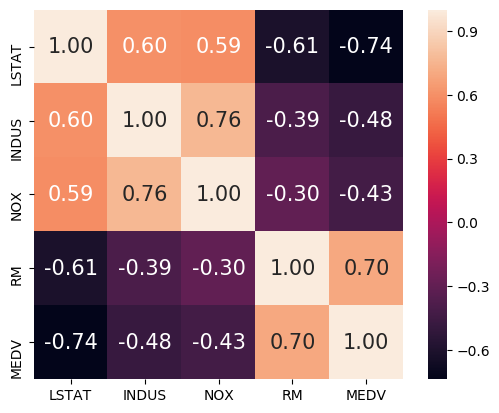

In [25]:
sns.reset_orig()  #> seaborn 설정값 초기화
cc = np.corrcoef(df[cols].values.T)  #> 상관계수

sns.heatmap(cc, yticklabels=cols, xticklabels=cols, annot=True, fmt=".2f", square=True, annot_kws={"size":15})

In [26]:
### ex> 방의 개수에 따른 집값 예측

def line_regplot(X, y, model):  #> 그래프 그리기 함수화
    plt.scatter(X, y, c="b")
    plt.plot(X, model.predict(X), c="g")
    
X = df[["RM"]].values  #> x는 2차원 배열(LinearRegression 특성)
y = df["MEDV"].values  #> y는 1차원 배열

lr = LinearRegression().fit(X, y)

In [27]:
slope = lr.coef_[0]  #> 기울기
intercept = lr.intercept_  #> 절편

Text(0, 0.5, '1000달러 단위 집값')

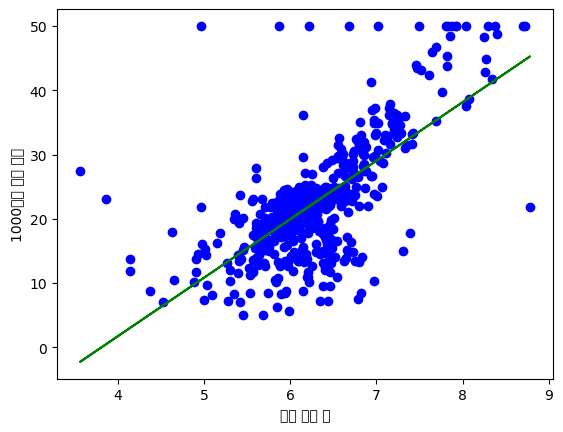

In [28]:
line_regplot(X, y, lr)

plt.xlabel("평균 방의 수")
plt.ylabel("1000달러 단위 집값")

In [29]:
# ex> 방이 5개일 때 집값 예측

num_rooms = np.array([[5.0]])
house_val = lr.predict(num_rooms)
print("방이 %d 개인 주택 가격은 약 %.f 달러이다" %(int(num_rooms), house_val*1000))

방이 5 개인 주택 가격은 약 10840 달러이다


In [30]:
round(float((slope*5+intercept)*1000))

10840

In [31]:
# 적합도 측정: MSE

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = boston.data[:, 5]
X = X.reshape(-1, 1)
X

mse = mean_squared_error(boston.target, lr.predict(X))  #> 예측값 넣어야 하나 test 데이터 따로 설정하지 않았기 때문에 데이터 넣음
mse  #> 평균제곱오차

r2 = r2_score(boston.target, lr.predict(X))
r2  #> 설명계수(약한 설명력을 갖는다(0.7 이상이 강한 설명력))

0.48352545599133423

### 릿지(Ridge) 회귀모델

+ 모델을 더 좋게 파라미터 조절할 수 없는 선현회귀모델의 단점 개선
+ L2 규제(Regularization) 사용
+ MSE + (알파*패널티) : 알파값 통해 규제 정도 조절 가능
+ 알파를 크게 하면 패널티의 효과가 커지고(가중치 감소), 작게 하면 반대가 된다

In [32]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [33]:
X, y = mglearn.datasets.load_extended_boston()  #> 특성이 많은 경우 테스트 위함(104개의 특성)
X.shape

(506, 104)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [35]:
lr = LinearRegression().fit(X_train, y_train)

In [36]:
print("훈련 점수: ", lr.score(X_train, y_train))
print("테스트 점수: ", lr.score(X_test, y_test))  #> 과적합(예측 불가능): 특성이 많은 경우 이렇게 나올 수 있다(다중공선성)

훈련 점수:  0.9520519609032729
테스트 점수:  0.6074721959665752


In [37]:
ridge = Ridge().fit(X_train, y_train)  #> Ridge(alpha=1.0) 생략됨

In [38]:
print("훈련 점수: ", ridge.score(X_train, y_train))
print("테스트 점수: ", ridge.score(X_test, y_test))

훈련 점수:  0.885796658517094
테스트 점수:  0.7527683481744755


In [39]:
# alpha 값 높이면 훈련셋의 성능은 나빠지지만 일반화에는 도움이 된다(규제 강화)

ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("훈련 점수: ", ridge10.score(X_train, y_train))
print("테스트 점수: ", ridge10.score(X_test, y_test))

훈련 점수:  0.7882787115369614
테스트 점수:  0.635941148917731


In [40]:
# alpha 값 낮추면 훈련셋 성능은 높아지지만 일반화는 낮아진다(규제 약화)

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("훈련 점수: ", ridge01.score(X_train, y_train))
print("테스트 점수: ", ridge01.score(X_test, y_test))

훈련 점수:  0.9282273685001985
테스트 점수:  0.772206793647982


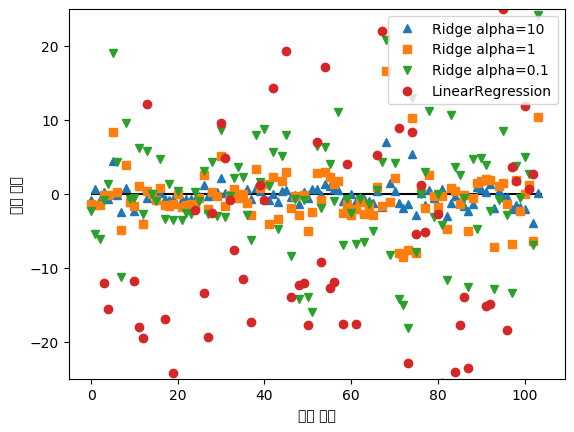

In [41]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

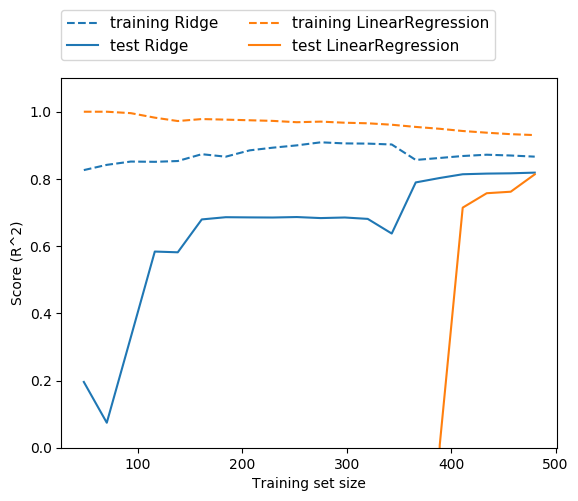

In [42]:
# alpha값 1.0으로 고정시킨 상태에서 데이터 크기 조절: 데이터 많을수록 과적합도 사라진다

mglearn.plots.plot_ridge_n_samples()

### 라쏘(Lasso) 회귀 모델

+ 선형 모델 대안(파라미터 조절 가능)
+ L1 규제 사용
+ 알파 크게 하면 패널티 효과 커지고, 작게 하면 반대가 된다
+ 특성 선택이 자동으로 이루어진다(가장 중요한 특성을 추려낼 경우 사용)

In [43]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)

print("훈련 점수: ", lasso.score(X_train, y_train))
print("테스트 점수: ", lasso.score(X_test, y_test))  #> 과소적합
print("사용한 특성 수: ", np.sum(lasso.coef_ != 0))  #> 104개의 특성 중 실제 사용한 특성 4개

훈련 점수:  0.29323768991114607
테스트 점수:  0.20937503255272294
사용한 특성 수:  4


In [44]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)  #> max_iter=최대반복횟수

print("훈련 점수: ", lasso001.score(X_train, y_train))
print("테스트 점수: ", lasso001.score(X_test, y_test))
print("사용한 특성 수: ", np.sum(lasso001.coef_ != 0))

훈련 점수:  0.8962226511086497
테스트 점수:  0.7656571174549983
사용한 특성 수:  33


In [45]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("훈련 점수: ", lasso00001.score(X_train, y_train))
print("테스트 점수: ", lasso00001.score(X_test, y_test))
print("사용한 특성 수: ", np.sum(lasso00001.coef_ != 0))

훈련 점수:  0.9507158754515467
테스트 점수:  0.6437467421272709
사용한 특성 수:  96


---
# 분류형 선형 모델

1. 로지스틱 회귀분석
    + sigmoid 그래프
    + 오차 구하는 공식 : 로지스틱 loss function

2. SVM에서 제공하는 선형 모델
    + 교차 엔트로피 loss function
    
3. 다항 분류 때문에 Logistic 이 Logistic SVM(이진 분류) 보다 성능 더 좋다

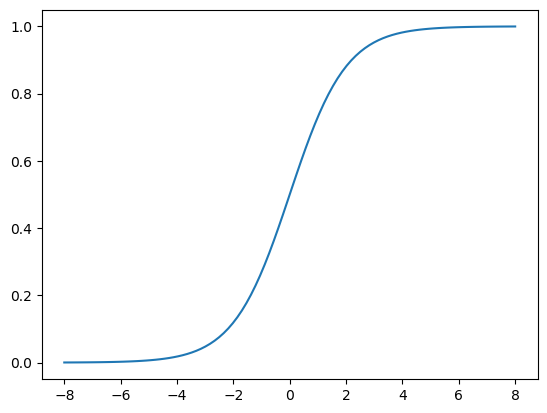

In [46]:
# sigmoid 그래프 그리기

def sigmoid(x):
    a = []
    for i in x:
        a.append(1/(1+np.exp(-i)))
        
    return a

x = np.linspace(-8, 8, 100)
sig = sigmoid(x)

plt.plot(x, sig)

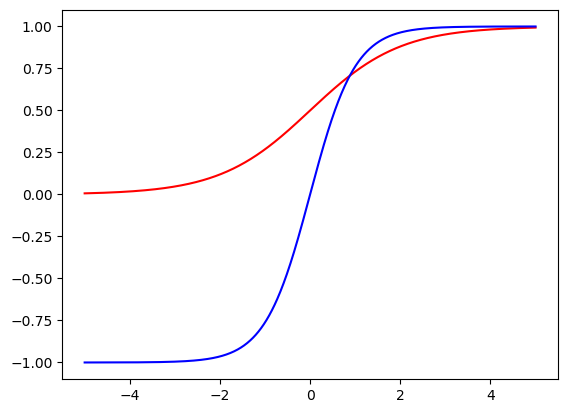

In [47]:
x = np.linspace(-5, 5, 1000)
plt.plot(x, 1/(1+np.exp(-x)), "r-")
plt.plot(x, np.tanh(x), "b-")

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

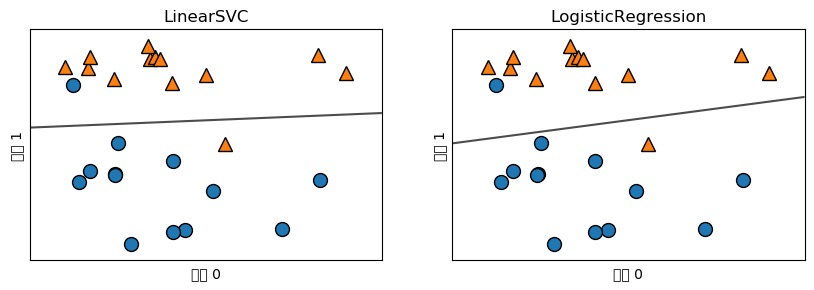

In [49]:
X, y = mglearn.datasets.make_forge()  #> 이진분류 위한 데이터셋

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

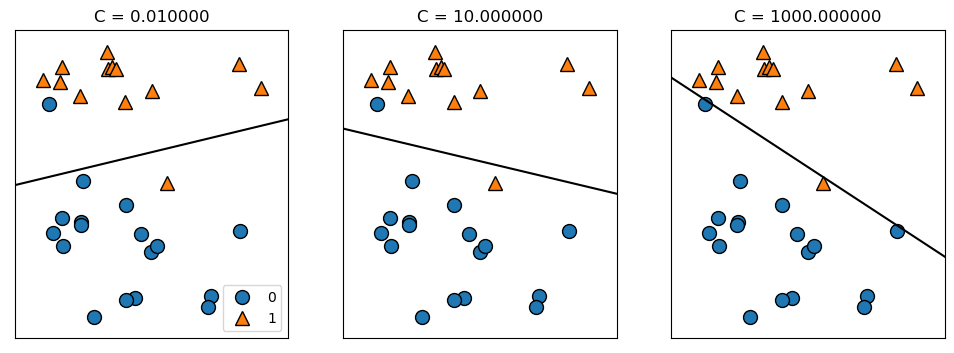

In [50]:
mglearn.plots.plot_linear_svc_regularization()  #> C 값 높을수록 최대한 현재 훈련 데이터에 맞춘다. 낮을수록 전체에 맞춘다

In [51]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42, stratify=cancer.target)

In [52]:
logreg = LogisticRegression().fit(X_train, y_train)

print("훈련 점수: ", logreg.score(X_train, y_train))
print("테스트 점수: ", logreg.score(X_test, y_test))

훈련 점수:  0.9553990610328639
테스트 점수:  0.958041958041958


In [53]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("훈련 점수: ", logreg100.score(X_train, y_train))
print("테스트 점수: ", logreg100.score(X_test, y_test))

훈련 점수:  0.971830985915493
테스트 점수:  0.965034965034965


In [54]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print("훈련 점수: ", logreg001.score(X_train, y_train))
print("테스트 점수: ", logreg001.score(X_test, y_test))

훈련 점수:  0.9342723004694836
테스트 점수:  0.9300699300699301


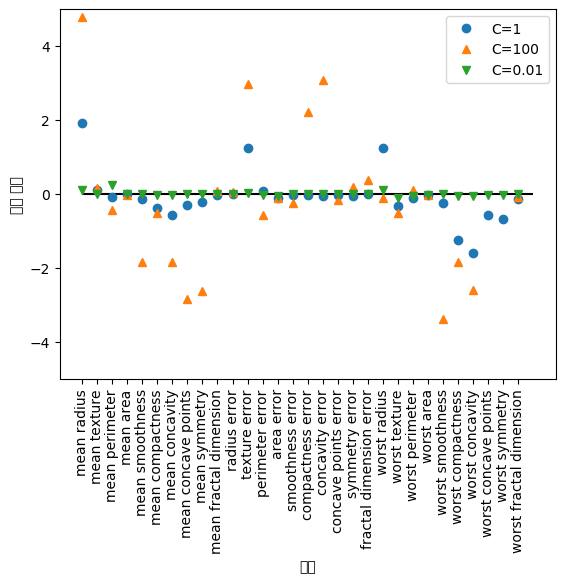

In [55]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.ylim(-5, 5)
plt.legend()

C=0.010인 l1 로지스틱 회귀의 훈련 정확도: 0.92
C=0.010인 l1 로지스틱 회귀의 테스트 정확도: 0.93
C=1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000인 l1 로지스틱 회귀의 테스트 정확도: 0.98


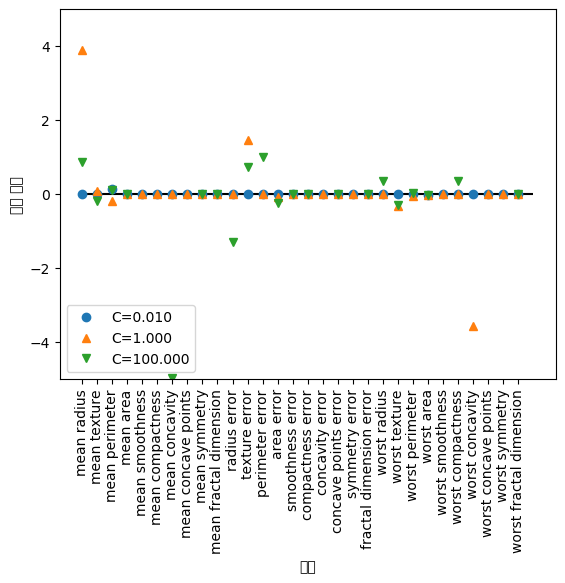

In [56]:
for C, marker in zip([0.01, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)  #> L1 penalty로 학습
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.ylim(-5, 5)
plt.legend(loc=3)

## 다중 클래스 분류용 선형 모델

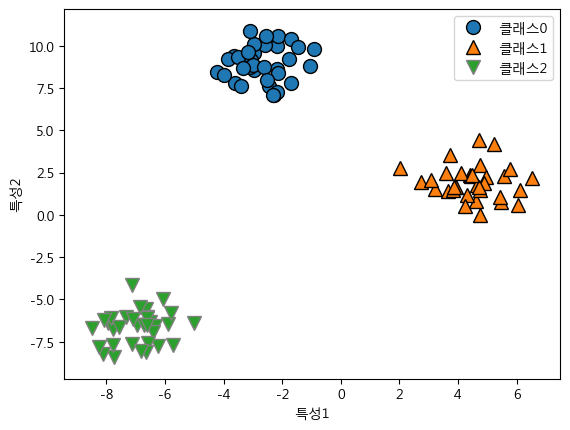

In [65]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("특성1")
plt.ylabel("특성2")
plt.legend(["클래스0", "클래스1", "클래스2"])

In [66]:
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


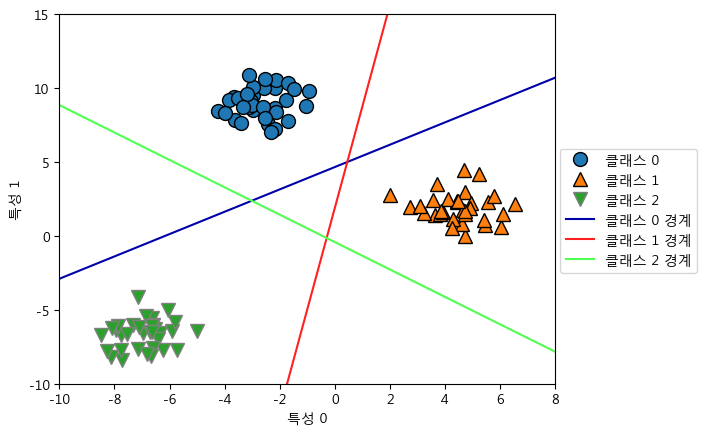

In [67]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계", "클래스 2 경계"], loc=(1.01, 0.3))
    #> 2진 분류를 3번 한다

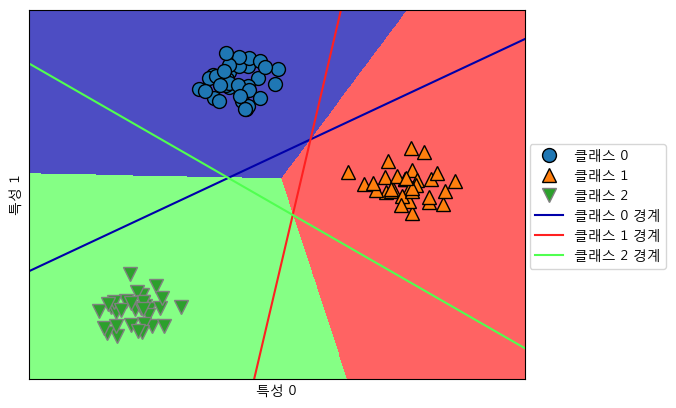

In [68]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계", "클래스 2 경계"], loc=(1.01, 0.3))
    #> 가운데 공통영역의 영역처리 시각화

## 적합도 검정

    1) Accuracy(정확성)
    
    2) Precision(정밀성)
    
    3) Recall
    
    4) F1 Score : Precision + Recall (confusion matrix)

In [69]:
array = [[5, 0, 0, 0], [0, 10, 0, 0], [0, 0, 15, 0], [0, 0, 0, 5]]

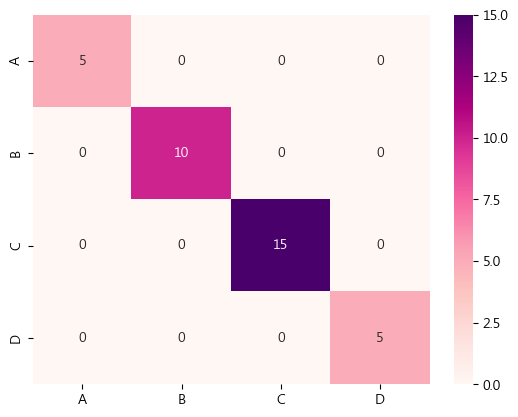

In [72]:
# confusion matrix 가장 잘 표현하는 그래프가 heatmap

df = pd.DataFrame(array, index=[i for i in "ABCD"], columns=[i for i in "ABCD"])

sns.heatmap(df, annot=True, cmap="RdPu")

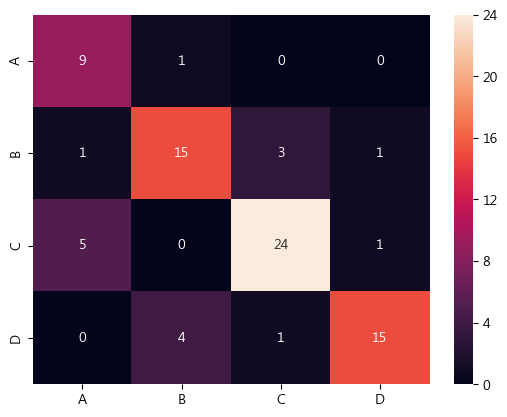

In [74]:
array = [[9, 1, 0, 0], [1, 15, 3, 1], [5, 0, 24, 1], [0, 4, 1, 15]]

df = pd.DataFrame(array, index=[i for i in "ABCD"], columns=[i for i in "ABCD"])

sns.heatmap(df, annot=True)  #> ABCD 각 개수가 다르기 때문에 C를 잘 맞췄다고 판단x => 정규화 필요(각 편차 조정 필요)

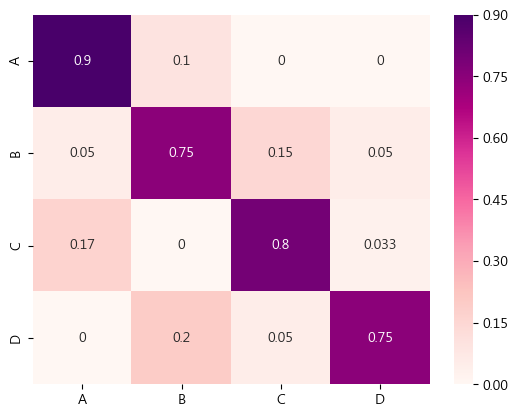

In [77]:
array = [[9, 1, 0, 0], [1, 15, 3, 1], [5, 0, 24, 1], [0, 4, 1, 15]]

total = np.sum(array, axis=1)
array = array / total[:, None]

df = pd.DataFrame(array, index=[i for i in "ABCD"], columns=[i for i in "ABCD"])

sns.heatmap(df, annot=True, cmap="RdPu")

In [80]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)  
    #> 0인데 맞춘 것 2개, 1인데 맞춘 것 0개, 2인데 맞춘 것 2개, 2인데 0이라 한 것 1개, 1인데 2라 한 것 1개

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [83]:
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]

confusion_matrix(y_true, y_pred)  
    #> 0인데 맞춘 것 2개, 1인데 맞춘 것 3개, 1인데 0이라 틀린 것 1개
    #> labels=[1, 0] 통해 인덱스 순서 변경 가능

array([[2, 0],
       [1, 3]], dtype=int64)

In [85]:
y_true = [0, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1]

from sklearn.metrics import classification_report  #> precision, recall, f1-score 등 계산하여 보여준다

print(classification_report(y_true, y_pred, target_names=["class0", "class1"]))

              precision    recall  f1-score   support

      class0       0.75      0.60      0.67         5
      class1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [89]:
# ROC curve $ AUC

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=0)

In [90]:
model = LogisticRegression().fit(X, y)

In [91]:
y_hat = model.predict(X)

In [92]:
print(y_hat[:40])
print(y[:40])

[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]
[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]


In [93]:
confusion_matrix(y, y_hat, labels=[1, 0])  #> 0인데 1로 답한 것이 20개, 1인데 0으로 답한 것이 29개

array([[474,  29],
       [ 20, 477]], dtype=int64)

In [94]:
print(classification_report(y, y_hat, target_names=["class1", "class0"]))

              precision    recall  f1-score   support

      class1       0.94      0.96      0.95       497
      class0       0.96      0.94      0.95       503

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



Text(0, 0.5, 'True Positive Rate(Recall)')

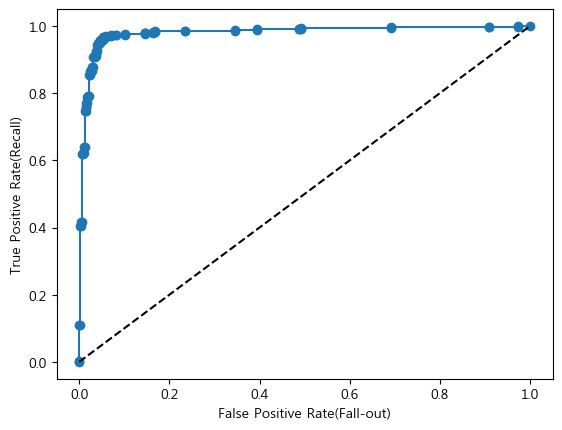

In [95]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))  #> recall값에 대한 확률

plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel("False Positive Rate(Fall-out)")
plt.ylabel("True Positive Rate(Recall)")  #> 커브가 직선에 가까울수록 성능 안 좋다(면적=AUC이 넓을수록 성능이 좋다)

### 사례1. 타이타닉 예제

+ 성능을 제대로 측정했는가에 대한 관점

In [99]:
df = pd.read_csv("data/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [100]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
cols_to_keep = ["Survived", "Age", "Fare"]

In [101]:
dummy_pclass = pd.get_dummies(df["Pclass"], prefix="Pclass")  #> 데이터를 카테고리로(객실 등급에 의미가 없도록)
print(dummy_pclass.head())

   Pclass_1  Pclass_2  Pclass_3
0         0         0         1
1         1         0         0
2         0         0         1
3         1         0         0
4         0         0         1


In [102]:
dummy_sex = pd.get_dummies(df["Sex"], prefix="Sex")  #> prefix=접두사 설정
print(dummy_sex.head())

   Sex_female  Sex_male
0           0         1
1           1         0
2           1         0
3           1         0
4           0         1


In [103]:
data = df[cols_to_keep].join(dummy_pclass.loc[:, "Pclass_1":])
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,0,0,1
1,1,38.0,71.2833,1,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,1,0,0
4,0,35.0,8.0500,0,0,1


In [104]:
data = data.join(dummy_sex.loc[:, "Sex_male"])
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,0,22.0,7.2500,0,0,1,1
1,1,38.0,71.2833,1,0,0,0
2,1,26.0,7.9250,0,0,1,0
3,1,35.0,53.1000,1,0,0,0
4,0,35.0,8.0500,0,0,1,1


In [105]:
train_cols = data.columns[1:]
train_cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male'], dtype='object')

In [106]:
np.isnan(data[train_cols])

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,True,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [107]:
# data[train_cols] = data[train_cols].dropna(axis=0) #> 결측치 삭제
# data["Survived"] = data["Survived"].dropna(axis=0)

data[train_cols] = data[train_cols].fillna(0)
data["Survived"] = data["Survived"].fillna(0)  #> 결측치 0으로 채움

In [108]:
import statsmodels.api as sm  #> 분석 결과 자세히 보기 위한 패키지(예측x. 기술적인 요약분석). sklearn은 예측 위한 패키지

model = sm.Logit(data["Survived"], data[train_cols]).fit()
model.summary2()  #> P>|z| 값에 따라 Survived와 Fare는 상관관계 없다고 나온다  

Optimization terminated successfully.
         Current function value: 0.458488
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.311     
Dependent Variable: Survived         AIC:              829.0250  
Date:               2019-10-10 12:16 BIC:              857.7791  
No. Observations:   891              Log-Likelihood:   -408.51   
Df Model:           5                LL-Null:          -593.33   
Df Residuals:       885              LLR p-value:      1.0371e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age          -0.0159    0.0053   -2.9843  0.0028  -0.0264  -0.0055
Fare          0.0015    0.0021    0.7370  0.4611  -0.0026   0.0056
Pclass_1      2.6932    0.3372    7.9875  0.0000   2.0323   3.3540
Pclass_2      1.8519    0.2670    6.9358  0.0000   1.3286   2.3752
Pclass_3      0.6215    0.1808    3.4377  0.0006   0.2672   0.9758
Sex_male     -2.6151    0.1860  -14.0594  0.0000  -2.9797  -2.2505
=================================================================

"""

In [109]:
model2 = LogisticRegression().fit(data[train_cols], data["Survived"])

In [110]:
data["Predict"] = model2.predict(data[train_cols])
data.head(30)

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,Predict
0,0,22.0,7.2500,0,0,1,1,0
1,1,38.0,71.2833,1,0,0,0,1
2,1,26.0,7.9250,0,0,1,0,1
3,1,35.0,53.1000,1,0,0,0,1
4,0,35.0,8.0500,0,0,1,1,0
5,0,0.0,8.4583,0,0,1,1,0
6,0,54.0,51.8625,1,0,0,1,0
7,0,2.0,21.0750,0,0,1,1,0
8,1,27.0,11.1333,0,0,1,0,1
9,1,14.0,30.0708,0,1,0,0,1


In [111]:
confusion_matrix(data["Survived"], data["Predict"]) 

array([[458,  91],
       [100, 242]], dtype=int64)

In [114]:
# Accuracy 확인

print("정확도: ", model2.score(data[train_cols], data["Survived"]))
print("정확도(공식 대입): ", (242+458)/(242+100+458+91))

정확도:  0.7856341189674523
정확도(공식 대입):  0.7856341189674523


In [118]:
# F-1 score 확인

print(classification_report(data["Survived"], data["Predict"], target_names=["class0", "class1"]))

              precision    recall  f1-score   support

      class0       0.82      0.83      0.83       549
      class1       0.73      0.71      0.72       342

    accuracy                           0.79       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.78      0.79      0.79       891



Text(0, 0.5, 'True Positive Rate(Recall)')

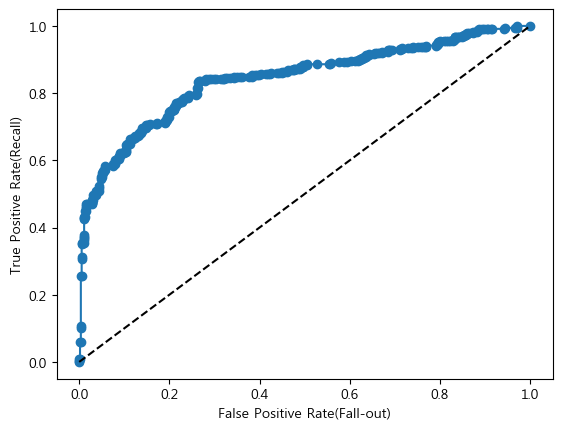

In [119]:
fpr, tpr, thresholds = roc_curve(data["Survived"], model2.decision_function(data[train_cols]))  #> recall값에 대한 확률

plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel("False Positive Rate(Fall-out)")
plt.ylabel("True Positive Rate(Recall)")  #> 커브가 직선에 가까울수록 성능 안 좋다(면적=AUC 넓을수록 성능이 좋다)

### 사례2. Cancer 데이터셋

+ 좋은 성능을 내기 위한 방법에 대한 관점

In [133]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.target_names)
print(cancer.data)
print(cancer.feature_names)
print(cancer.data[0])

['malignant' 'benign']
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[1.799e+01 1.0

In [134]:
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [135]:
sy = pd.Series(cancer.target, dtype="category")
data["class"] = sy
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [136]:
X = data.loc[:, "mean radius":"worst fractal dimension"]
y = data["class"]

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)  #> test_size=기본값0.25
print(len(X_train), len(X_test), len(y_train), len(y_test))

426 143 426 143


In [138]:
log_reg = LogisticRegression().fit(X_train, y_train)

In [139]:
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()  #> OLS() 오차 최소화 함수
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Thu, 10 Oct 2019   Prob (F-statistic):          6.05e-153
Time:                        14:52:28   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [141]:
# 정확도

from sklearn import metrics

y_pred = log_reg.predict(X_test)
print("정확도: ", metrics.accuracy_score(y_test, y_pred))

정확도:  0.958041958041958


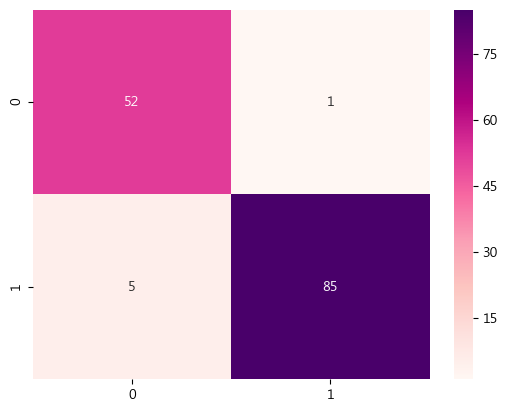

In [143]:
cnt = metrics.confusion_matrix(y_test, y_pred)
cnt

sns.heatmap(pd.DataFrame(cnt), annot=True, cmap="RdPu")

In [144]:
# p_value < 0.05

X = data[["mean compactness", "smoothness error", "concavity error", "worst radius", "worst area"]]
y = data["class"]

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [146]:
log_reg = LogisticRegression().fit(X_train, y_train)

In [147]:
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     239.8
Date:                Thu, 10 Oct 2019   Prob (F-statistic):          6.37e-137
Time:                        14:58:27   Log-Likelihood:                -69.240
No. Observations:                 569   AIC:                             150.5
Df Residuals:                     563   BIC:                             176.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9459      0.145  

In [148]:
# 정확도

from sklearn import metrics

y_pred = log_reg.predict(X_test)
print("정확도: ", metrics.accuracy_score(y_test, y_pred))

정확도:  0.9230769230769231


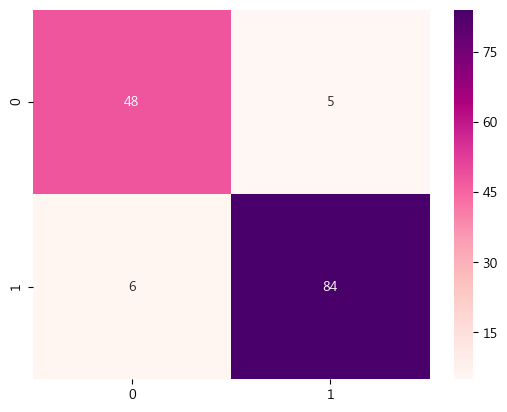

In [149]:
cnt = metrics.confusion_matrix(y_test, y_pred)
cnt

sns.heatmap(pd.DataFrame(cnt), annot=True, cmap="RdPu")

In [150]:
# p_value > 0.05

X = data[["mean texture", "mean smoothness", "mean fractal dimension", "mean symmetry", "compactness error"]]
y = data["class"]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [152]:
log_reg = LogisticRegression().fit(X_train, y_train)

In [153]:
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     92.92
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           3.02e-71
Time:                        15:05:28   Log-Likelihood:                -222.69
No. Observations:                 569   AIC:                             457.4
Df Residuals:                     563   BIC:                             483.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [154]:
# 정확도

from sklearn import metrics

y_pred = log_reg.predict(X_test)
print("정확도: ", metrics.accuracy_score(y_test, y_pred))

정확도:  0.7342657342657343


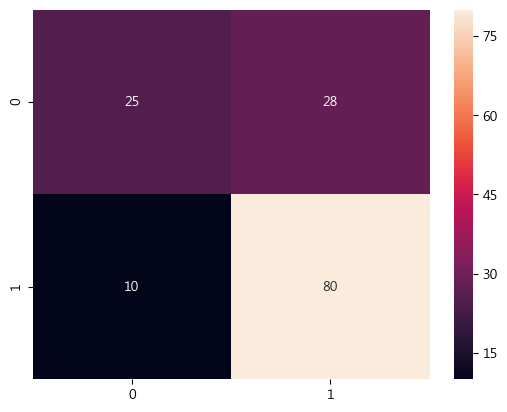

In [155]:
cnt = metrics.confusion_matrix(y_test, y_pred)
cnt

sns.heatmap(pd.DataFrame(cnt), annot=True)